<a href="https://colab.research.google.com/github/kasalehi/LogistRegression_with_Tensorflow/blob/main/binarry_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# let import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [10]:
import zipfile
unzip=zipfile.ZipFile('data.zip')
unzip.extractall()
unzip.close()

array([[[109,  72,  30],
        [114,  76,  39],
        [108,  71,  42],
        ...,
        [109,  59,  36],
        [101,  54,  28],
        [112,  65,  37]],

       [[124,  87,  45],
        [115,  80,  42],
        [108,  71,  42],
        ...,
        [110,  62,  39],
        [110,  63,  37],
        [115,  70,  41]],

       [[130,  95,  53],
        [120,  85,  47],
        [115,  79,  47],
        ...,
        [108,  62,  39],
        [119,  73,  49],
        [122,  78,  51]],

       ...,

       [[ 41,  31,  32],
        [ 42,  32,  33],
        [ 43,  33,  34],
        ...,
        [154, 143, 125],
        [153, 141, 125],
        [153, 141, 125]],

       [[ 42,  32,  33],
        [ 42,  32,  33],
        [ 42,  32,  33],
        ...,
        [155, 143, 127],
        [155, 143, 127],
        [154, 142, 126]],

       [[ 42,  32,  33],
        [ 41,  31,  32],
        [ 41,  31,  32],
        ...,
        [155, 143, 127],
        [154, 142, 126],
        [154, 142, 126]]], dtype=uint8)
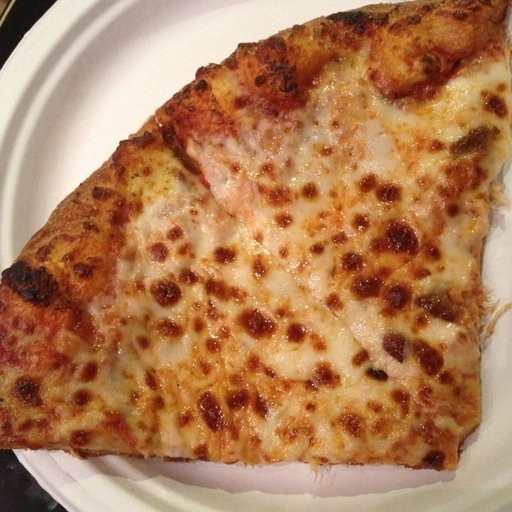

In [11]:
# lest see some data shape
import os
img=os.listdir('data/train/pizza')[0]
img_path=os.path.join('data/train/pizza',img)
plt.imread(img_path)

# what we have got from these data
 *  the shape is **(512,512,3)** : which are (weidth, height, color(channel))
 * all  data represent the img are a number between **0** and **255**

# the first step might should be preprocessing data as input for our model
 * devide all numbers by rescalling the 0 , 255
 * also convert (512,512,3) to (224,224, 3) which is common shape for image processing

In [13]:
train_dir='data/train/'
test_dir='data/test/'

In [14]:
# lets do the preprocessing using Image genrators
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# normalize data
x_train_gen=ImageDataGenerator(rescale=1/255)
x_test_gen=ImageDataGenerator(rescale=1/255)

# now lets do apply on data

x_train=x_train_gen.flow_from_directory(
    train_dir,
    batch_size=32,
    target_size=(224,224),
    class_mode='binary',
    seed=42

)
x_test=x_test_gen.flow_from_directory(
    test_dir,
    batch_size=32,
    target_size=(224,224),
    class_mode='binary',
    seed=42

)
# we are almost done

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [16]:
x_test[0]

(array([[[[0.06666667, 0.02352941, 0.05490196],
          [0.08235294, 0.03921569, 0.0627451 ],
          [0.07450981, 0.03137255, 0.05490196],
          ...,
          [0.7137255 , 0.7294118 , 0.73333335],
          [0.72156864, 0.7372549 , 0.7490196 ],
          [0.70980394, 0.7254902 , 0.7372549 ]],
 
         [[0.10196079, 0.05882353, 0.08235294],
          [0.09019608, 0.04705883, 0.0627451 ],
          [0.08627451, 0.03921569, 0.05490196],
          ...,
          [0.69803923, 0.7137255 , 0.7176471 ],
          [0.7254902 , 0.7411765 , 0.75294125],
          [0.74509805, 0.7607844 , 0.7725491 ]],
 
         [[0.10588236, 0.05882353, 0.06666667],
          [0.10588236, 0.05882353, 0.06666667],
          [0.09411766, 0.04705883, 0.05490196],
          ...,
          [0.69411767, 0.70980394, 0.72156864],
          [0.7137255 , 0.7294118 , 0.7411765 ],
          [0.70980394, 0.7254902 , 0.7372549 ]],
 
         ...,
 
         [[0.14901961, 0.06666667, 0.04705883],
          [0.14117

In [27]:
# lest create asquential API keras layes
tf.random.set_seed(42)
model=tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(10,2,input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,2,activation='relu' ),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,2,input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,2,activation='relu' ),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')

])






model.compile(loss=tf.keras.losses.binary_crossentropy,
          optimizer=tf.keras.optimizers.Adam(),
          metrics=['accuracy'])

history=model.fit(x_train ,
          epochs=5,
          validation_data=(x_test)
          )

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 201ms/step - accuracy: 0.6538 - loss: 0.6348 - val_accuracy: 0.7920 - val_loss: 0.4452
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.7871 - loss: 0.4498 - val_accuracy: 0.8440 - val_loss: 0.3547
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.8269 - loss: 0.3886 - val_accuracy: 0.8620 - val_loss: 0.3301
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.8438 - loss: 0.3666 - val_accuracy: 0.8440 - val_loss: 0.3729
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.8647 - loss: 0.3296 - val_accuracy: 0.8600 - val_loss: 0.3091


In [28]:
# lets predict the data
y_pred=model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step


In [34]:
#?

In [32]:
# lets see the model summary :
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 223, 223, 10)   │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 222, 222, 10)   │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 110, 110, 10)   │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 109, 109, 10)   │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 29160)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        29,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,565 (357.68 KB)

 Trainable params: 30,521 (119.22 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,044 (238.46 KB)

<Axes: >

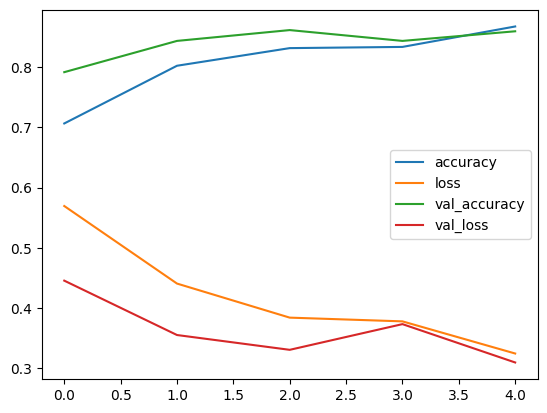

In [33]:
# now lets visualize the loss and accuracy

pd.DataFrame(history.history).plot()